In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

## Understanding the data

In [3]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


Notes:
There seems to be some outliers in the data- Age [123 max]

Addtional notes:
loan_percent_income
Meaning: This variable typically represents the percentage of a person's income that is allocated to loan payments. It is a measure of how much of an individual's income is being used to service debt.

cb_person_cred_hist_length
Meaning: This variable likely refers to the length of a person's credit history, often measured in months or years.

## Checking for empty data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

## L_Encoding

In [5]:
from sklearn import preprocessing
enc_home_owner = preprocessing.LabelEncoder()
enc_loan_intent = preprocessing.LabelEncoder()
enc_loan_grade = preprocessing.LabelEncoder()
enc_cb_person_default_on_file = preprocessing.LabelEncoder()
train["person_home_ownership"] = enc_home_owner.fit_transform(train["person_home_ownership"])
train["loan_intent"] = enc_loan_intent.fit_transform(train["loan_intent"])
train["loan_grade"] = enc_loan_grade.fit_transform(train["loan_grade"])
train["cb_person_default_on_file"] = enc_cb_person_default_on_file.fit_transform(train["cb_person_default_on_file"])
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


In [6]:
train.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


## Checking for outliers

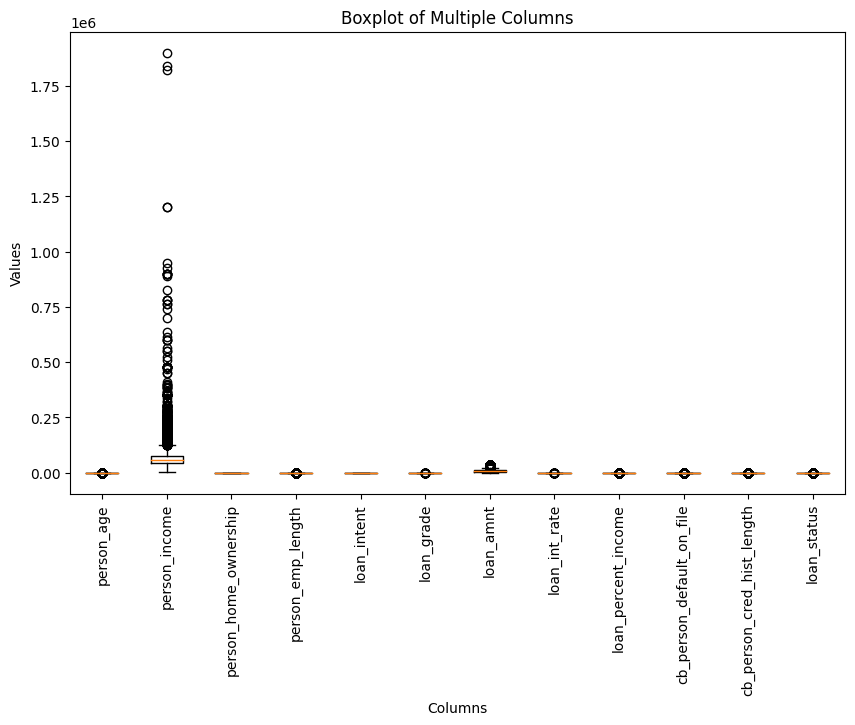

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([train[col] for col in list(train.columns[1:])],labels = list(train.columns[1:]))
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()


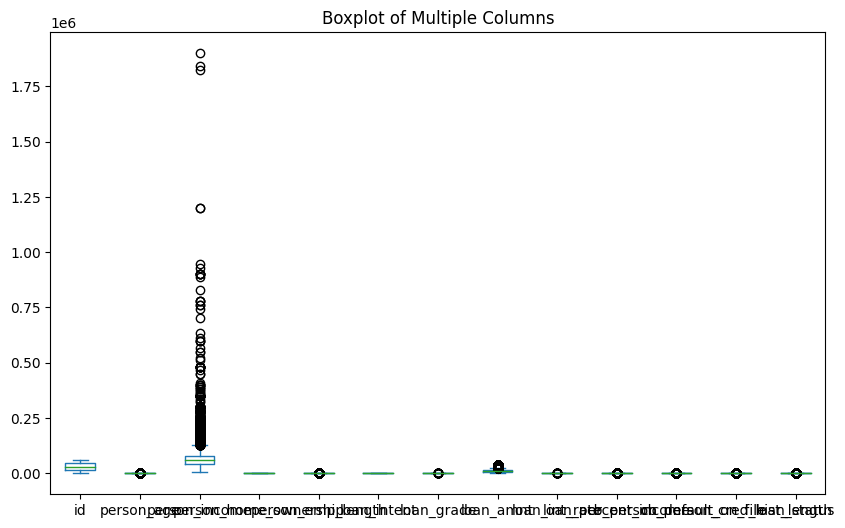

In [8]:
train.plot(kind='box', figsize=(10, 6), title='Boxplot of Multiple Columns')
plt.show()

#### Something weird going on the income side,need to deep dive

#### Standardising the data for db scan

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledtrain_data = scaler.fit_transform(train)


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=1.2, min_samples=5)  # Adjust eps and min_samples as necessary
dbscan.fit(scaledtrain_data)
train_cluster = train.copy()

train_cluster['cluster'] = dbscan.labels_

train_cluster


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,cluster
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0,-1
58641,58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1,-1
58642,58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1,2
58643,58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0,0


In [11]:
train_cluster.cluster.value_counts()

cluster
 0     39323
-1      9914
 1      4275
 2      3250
 3      1232
       ...  
 55        3
 12        3
 18        3
 70        3
 43        2
Name: count, Length: 75, dtype: int64

#### Getting too many clusters based on density
Can be used to for further cleaning if the results are not as well as expected.

In [12]:
train_cluster[train_cluster["person_income"]>750000]
train_cluster[train_cluster["cluster"] == -1]
train_cluster[train_cluster["person_age"]>100]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,cluster
47336,47336,123,36000,0,7.0,4,1,6700,10.75,0.18,0,4,0,-1


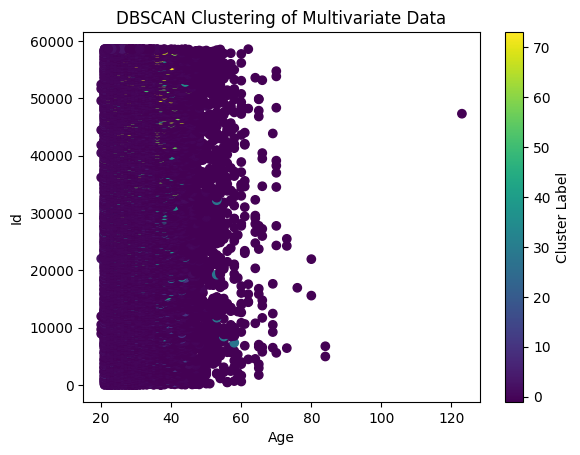

In [13]:
plt.scatter(train_cluster['person_age'], train_cluster['id'], c=train_cluster['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Id')
plt.title('DBSCAN Clustering of Multivariate Data')
plt.colorbar(label='Cluster Label')
plt.show()

#### Based on the outliers identified from age and income, its seems cluster "-1" has found out a subclass of outliers. Will remove this for the time being and proceed.

In [14]:
train_outlier_cleaned = train.drop(train_cluster[train_cluster["cluster"] == -1].index)

<Axes: >

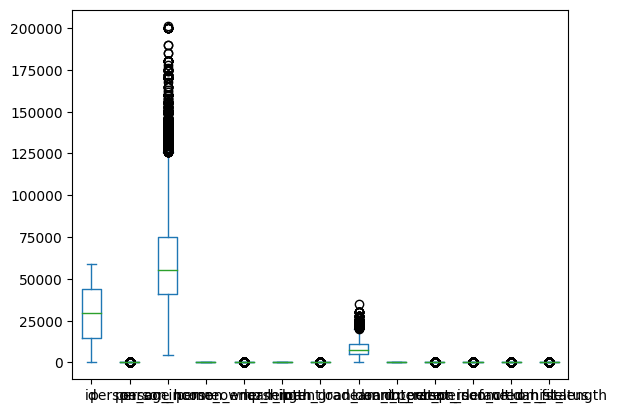

In [15]:
train_outlier_cleaned.plot(kind="box")

## Standardising the data

In [16]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_data = scaler.fit_transform(train_outlier_cleaned)

train_scaled = pd.DataFrame(train_scaled_data, columns=train_outlier_cleaned.columns)

train_scaled


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.000000,0.447368,0.156504,1.000000,0.000000,0.2,0.25,0.159420,0.437635,0.326923,0.0,0.444444,0.0
1,0.000017,0.052632,0.263211,0.666667,0.285714,0.6,0.50,0.101449,0.571738,0.134615,0.0,0.000000,0.0
2,0.000034,0.236842,0.125000,0.666667,0.380952,0.8,0.00,0.159420,0.250901,0.403846,0.0,0.296296,0.0
3,0.000051,0.263158,0.334350,1.000000,0.666667,1.0,0.25,0.333333,0.410238,0.326923,0.0,0.111111,0.0
4,0.000068,0.052632,0.283537,1.000000,0.095238,0.6,0.00,0.159420,0.108147,0.192308,0.0,0.037037,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48726,0.999881,0.105263,0.359756,1.000000,0.380952,1.0,0.25,0.101449,0.384283,0.096154,0.0,0.074074,0.0
48727,0.999915,0.052632,0.334350,1.000000,0.285714,0.0,0.00,0.275362,0.134823,0.269231,0.0,0.074074,0.0
48728,0.999966,0.078947,0.202236,1.000000,0.333333,0.2,0.75,0.182609,0.762797,0.288462,0.0,0.000000,1.0
48729,0.999983,0.052632,0.131098,1.000000,0.095238,0.2,0.00,0.130435,0.250901,0.326923,0.0,0.037037,0.0


In [17]:
train_scaled = train_scaled.drop(columns = ["id"])

In [18]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48731 entries, 0 to 48730
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  48731 non-null  float64
 1   person_income               48731 non-null  float64
 2   person_home_ownership       48731 non-null  float64
 3   person_emp_length           48731 non-null  float64
 4   loan_intent                 48731 non-null  float64
 5   loan_grade                  48731 non-null  float64
 6   loan_amnt                   48731 non-null  float64
 7   loan_int_rate               48731 non-null  float64
 8   loan_percent_income         48731 non-null  float64
 9   cb_person_default_on_file   48731 non-null  float64
 10  cb_person_cred_hist_length  48731 non-null  float64
 11  loan_status                 48731 non-null  float64
dtypes: float64(12)
memory usage: 4.5 MB


## Feature Engineering

<Axes: >

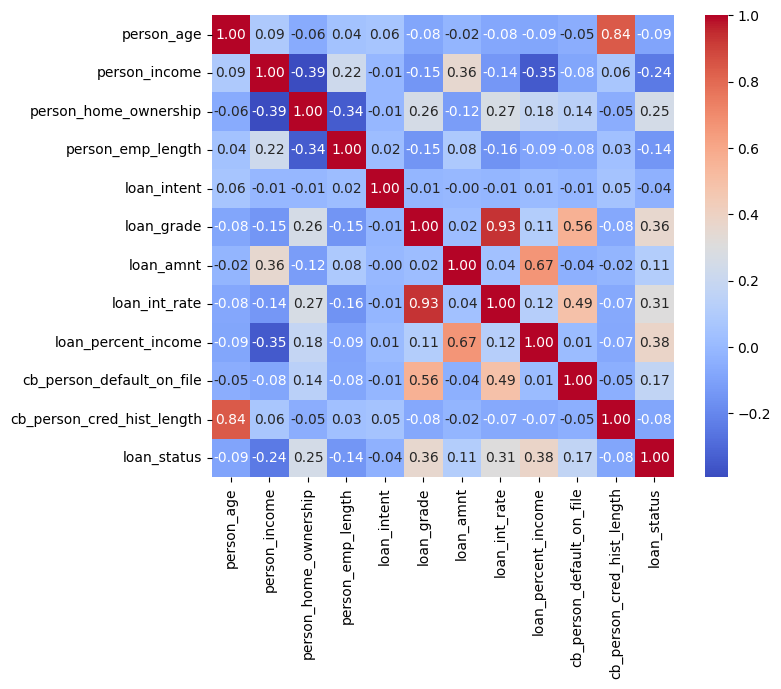

In [19]:
import seaborn as sns
correlation_matrix = train_scaled.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Calling the function and displaying the result
vif_result = calculate_vif(train_scaled)
print(vif_result)

                       feature        VIF
0                   person_age  10.109640
1                person_income  10.416789
2        person_home_ownership   2.958199
3            person_emp_length   2.840097
4                  loan_intent   2.992522
5                   loan_grade  17.956507
6                    loan_amnt  17.183152
7                loan_int_rate  29.399386
8          loan_percent_income  16.153247
9    cb_person_default_on_file   1.681576
10  cb_person_cred_hist_length   6.613573
11                 loan_status   1.578005


person_age == cb_person_cred_hist_length

person_income == loan_percent_income

loan_grad == loan_int_rate

loan_amnt = loan_percent_income
